In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn import preprocessing

In [2]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
from sklearn.metrics import silhouette_score

In [2]:
def df_creater(floc1,floc2):
    Crime = pd.read_csv(floc1)
    Crime = Crime[['DBN','Major N','Oth N','NoCrim N','Prop N','Vio N']]
    Crime['Total N'] = Crime['Major N'] +Crime['Oth N'] +Crime['NoCrim N'] +Crime['Prop N'] + Crime['Vio N']
    Crime = Crime.fillna(0)
    SQR = pd.read_csv(floc2)
    if 'School Type' not in SQR.columns:
        if 'High' in floc2:
            SQR['School type'] = 'High School'
    SQR = SQR[['DBN', 'Enrollment', 'Rigorous Instruction - Percent Positive',
       'Collaborative Teachers - Percent Positive',
       'Supportive Environment - Percent Positive',
       'Effective School Leadership - Percent Positive',
       'Strong Family-Community Ties - Percent Positive',
       'Trust - Percent Positive', 'Percent English Language Learners',
       'Percent Students with Disabilities', 'Percent Self-Contained',
       'Economic Need Index',
       'Percent in Temp Housing', 'Percent HRA Eligible', 'Percent Asian',
       'Percent Black', 'Percent Hispanic', 'Percent White',
       'Years of principal experience at this school',
       'Percent of teachers with 3 or more years of experience',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Teacher Attendance Rate', 'Rigorous Instruction Rating',
       'Collaborative Teachers Rating', 'Supportive Environment Rating',
       'Effective School Leadership Rating',
       'Strong Family-Community Ties Rating', 'Trust Rating',
       'Student Achievement Rating','School Type']]

    Crime_merge_SQR = pd.merge(Crime,SQR, on = ['DBN'], how= 'inner')
    #Crime_merge_HQR['TimeStamp'] = '2017-2018'
    Crime_merge_SQR = Crime_merge_SQR.dropna()
    return Crime_merge_SQR

In [3]:
All_school = pd.concat([df_creater('2017-2018 Schools NYPD Crime Data Report.csv','2017-2018_School_Quality_Reports_-_Elem__Middle___K-8.csv'),
                                    df_creater('2017-2018 Schools NYPD Crime Data Report.csv','2017-2018_School_Quality_Report_-_High_School.csv')], axis = 0)
All_school.to_csv('All school.csv')

In [38]:
data = pd.read_csv("All school.csv")
data.head()

,Unnamed: 0,DBN,Major N,Oth N,NoCrim N,Prop N,Vio N,Total N,Enrollment,Rigorous Instruction - Percent Positive,...,Percent of Students Chronically Absent,Teacher Attendance Rate,Rigorous Instruction Rating,Collaborative Teachers Rating,Supportive Environment Rating,Effective School Leadership Rating,Strong Family-Community Ties Rating,Trust Rating,Student Achievement Rating,School Type
0,1,22K052,1.0,1.0,0.0,2.0,0.0,4.0,751,0.88,...,0.233,0.966,Meeting Target,Exceeding Target,Meeting Target,Meeting Target,Meeting Target,Exceeding Target,Approaching Target,Elementary
1,2,28Q008,0.0,0.0,0.0,0.0,0.0,0.0,339,0.83,...,0.348,0.964,Meeting Target,Meeting Target,Approaching Target,Meeting Target,Approaching Target,Meeting Target,Meeting Target,Middle
2,3,13K301,0.0,0.0,0.0,0.0,0.0,0.0,99,0.74,...,0.468,0.965,Approaching Target,Meeting Target,Approaching Target,Meeting Target,Exceeding Target,Meeting Target,Approaching Target,Middle
3,4,14K120,0.0,2.0,3.0,2.0,0.0,7.0,369,0.87,...,0.290,0.963,Exceeding Target,Exceeding Target,Meeting Target,Exceeding Target,Exceeding Target,Exceeding Target,Meeting Target,Elementary
4,5,28Q174,0.0,0.0,0.0,0.0,0.0,0.0,643,0.77,...,0.147,0.960,Meeting Target,Meeting Target,Meeting Target,Approaching Target,Exceeding Target,Approaching Target,Approaching Target,Elementary


In [39]:
data.shape

(1351, 38)

In [5]:
df_NUM = data.replace({'Rigorous Instruction Rating': {'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Collaborative Teachers Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Supportive Environment Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Effective School Leadership Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Strong Family-Community Ties Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Trust Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4},
           'Student Achievement Rating':{'Not Meeting Target': 1, 'Approaching Target': 2,'Meeting Target':3,'Exceeding Target':4}})

In [6]:
df_NUM= df_NUM.iloc[:,2:]
df_NUM=pd.get_dummies(df_NUM)

In [7]:
data = preprocessing.normalize(df_NUM)
print(data.shape)

(1351, 39)


In [8]:
for n_clusters in range(2,7): #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = km.fit_predict(data)
    #report average Silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.5726762805495629
For n_clusters =3, the average silhouette_score is :0.45129019928600894
For n_clusters =4, the average silhouette_score is :0.4549747698345157
For n_clusters =5, the average silhouette_score is :0.3195331088665582
For n_clusters =6, the average silhouette_score is :0.31885799141596266


In [9]:
km = KMeans(n_clusters=2)
res = km.fit(data)
#print('Cluster assignments:',res.labels_)
#print('\nCluster centers:\n',res.cluster_centers_)
#print('\nSum of squared errors:',res.inertia_)

In [10]:
pred=km.predict(data)
df_NUM['overall_pred'] = list(pred)

In [11]:
list(enumerate(df_NUM.columns))

[(0, 'Major N'),
 (1, 'Oth N'),
 (2, 'NoCrim N'),
 (3, 'Prop N'),
 (4, 'Vio N'),
 (5, 'Total N'),
 (6, 'Enrollment'),
 (7, 'Rigorous Instruction - Percent Positive'),
 (8, 'Collaborative Teachers - Percent Positive'),
 (9, 'Supportive Environment - Percent Positive'),
 (10, 'Effective School Leadership - Percent Positive'),
 (11, 'Strong Family-Community Ties - Percent Positive'),
 (12, 'Trust - Percent Positive'),
 (13, 'Percent English Language Learners'),
 (14, 'Percent Students with Disabilities'),
 (15, 'Percent Self-Contained'),
 (16, 'Economic Need Index'),
 (17, 'Percent in Temp Housing'),
 (18, 'Percent HRA Eligible'),
 (19, 'Percent Asian'),
 (20, 'Percent Black'),
 (21, 'Percent Hispanic'),
 (22, 'Percent White'),
 (23, 'Years of principal experience at this school'),
 (24, 'Percent of teachers with 3 or more years of experience'),
 (25, 'Student Attendance Rate'),
 (26, 'Percent of Students Chronically Absent'),
 (27, 'Teacher Attendance Rate'),
 (28, 'Rigorous Instruction 

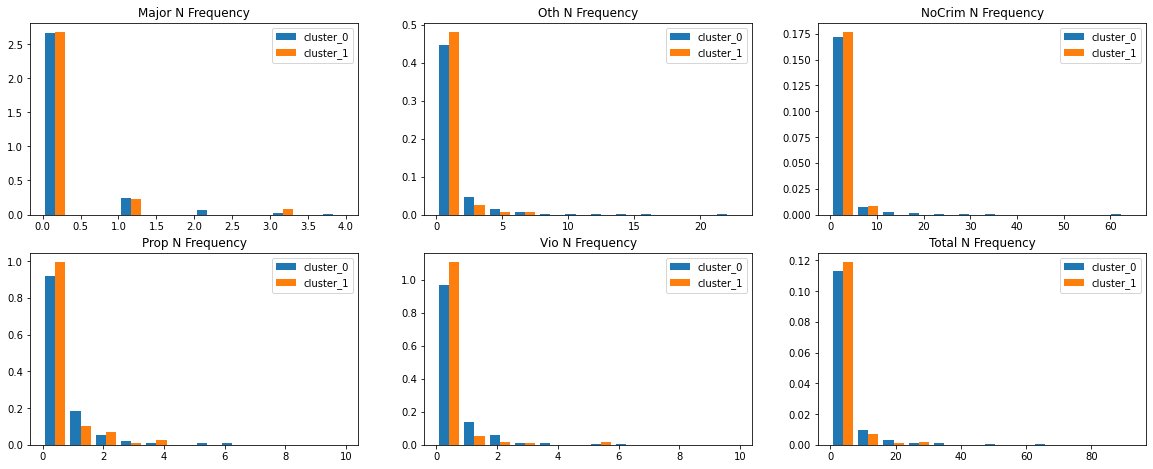

In [12]:
fig = plt.figure(figsize = (20,12));bins = 12
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['overall_pred']==0].iloc[:,i];y=df_NUM[df_NUM['overall_pred']==1].iloc[:,i]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    #ax.set_xlim([0,8])
    ax.set_title(df_NUM.columns[i]+' Frequency');ax.legend()

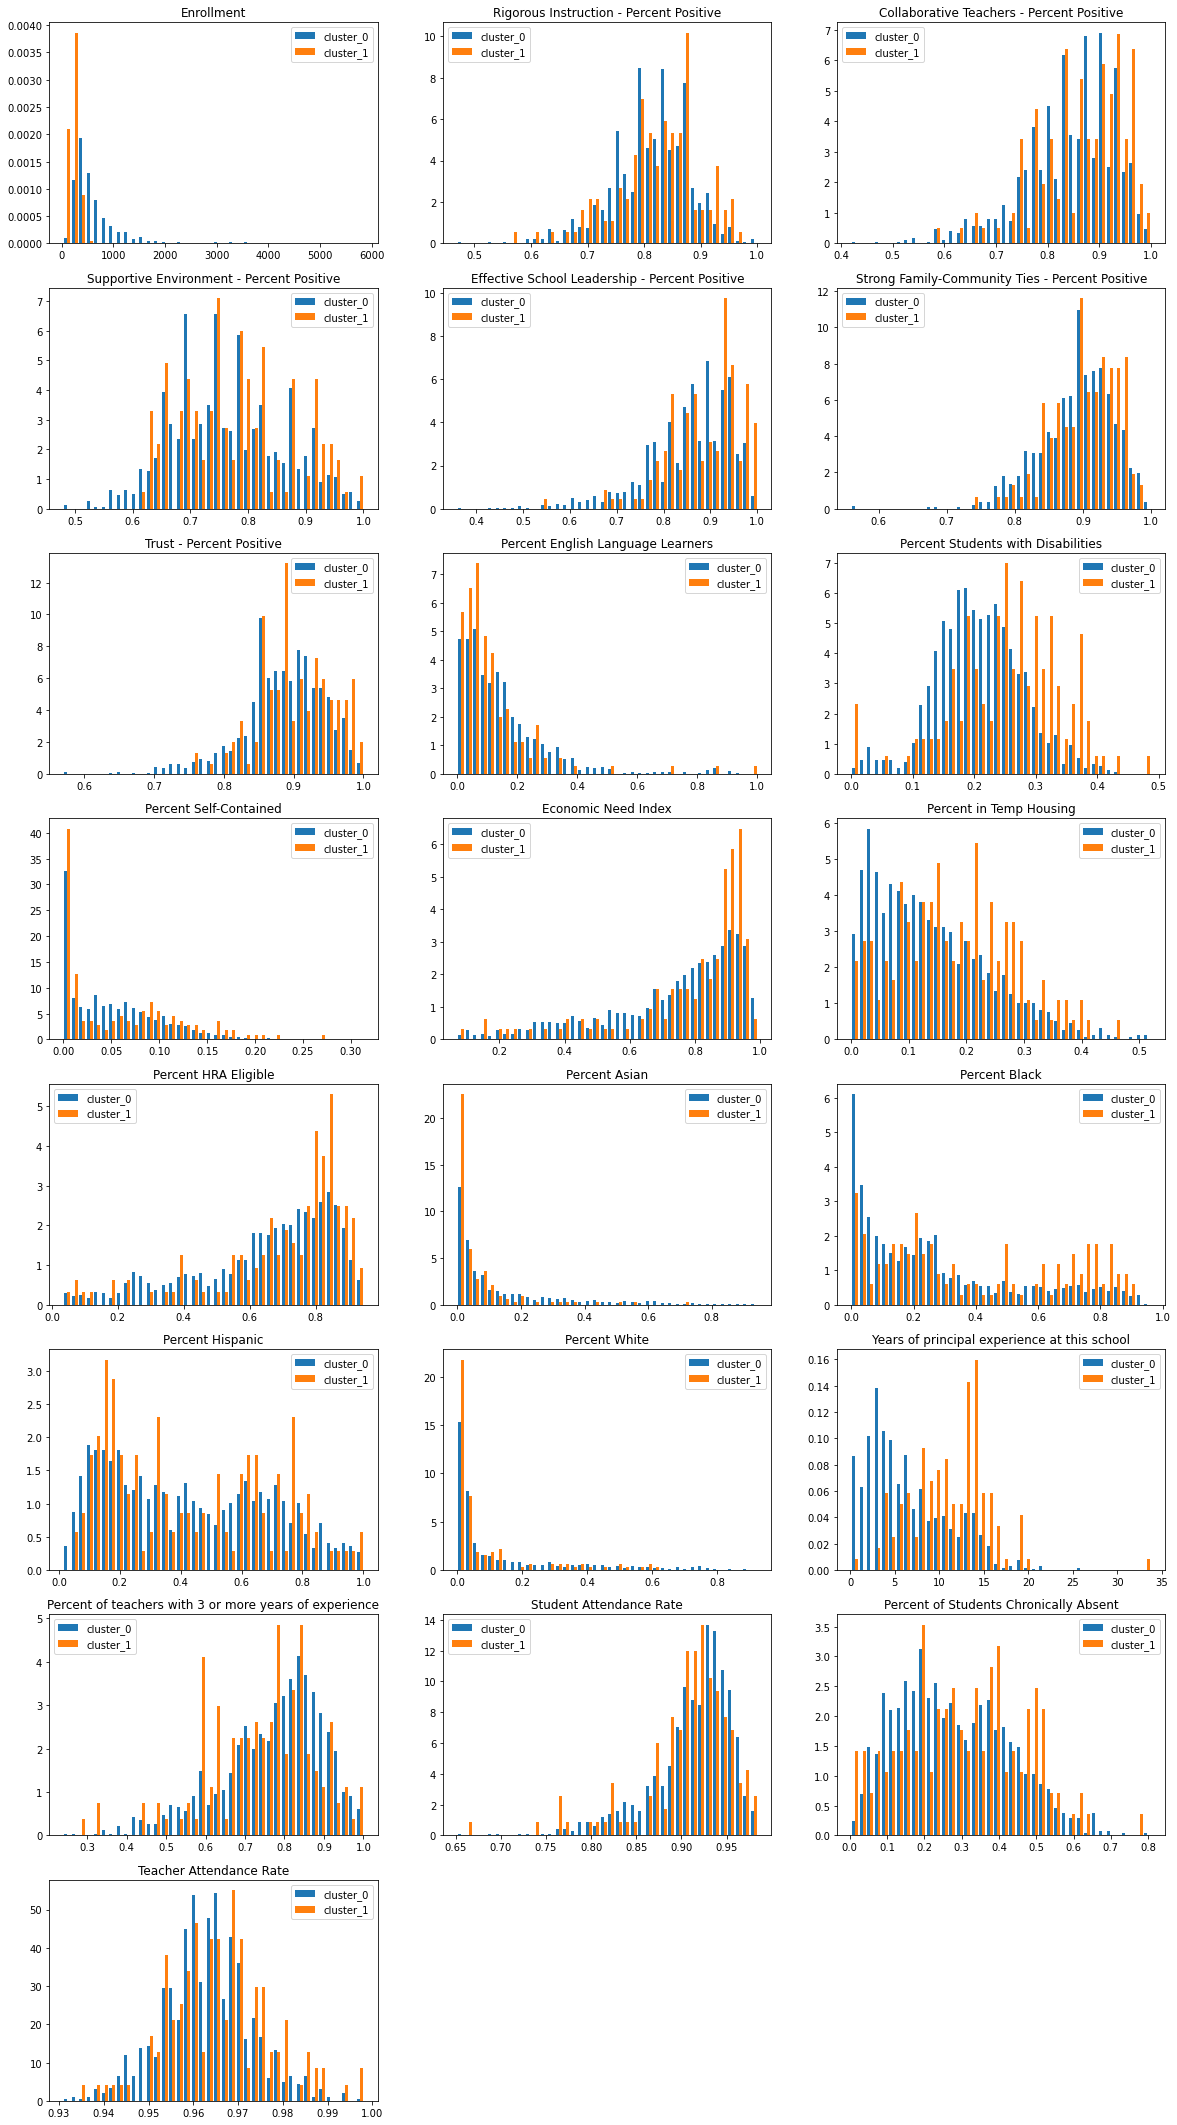

In [13]:
fig = plt.figure(figsize = (20,48));bins = 40
for i in range(22):
    ax = fig.add_subplot(10, 3, i+1)
    x=df_NUM[df_NUM['overall_pred']==0].iloc[:,i+6];y=df_NUM[df_NUM['overall_pred']==1].iloc[:,i+6]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+6]);ax.legend()

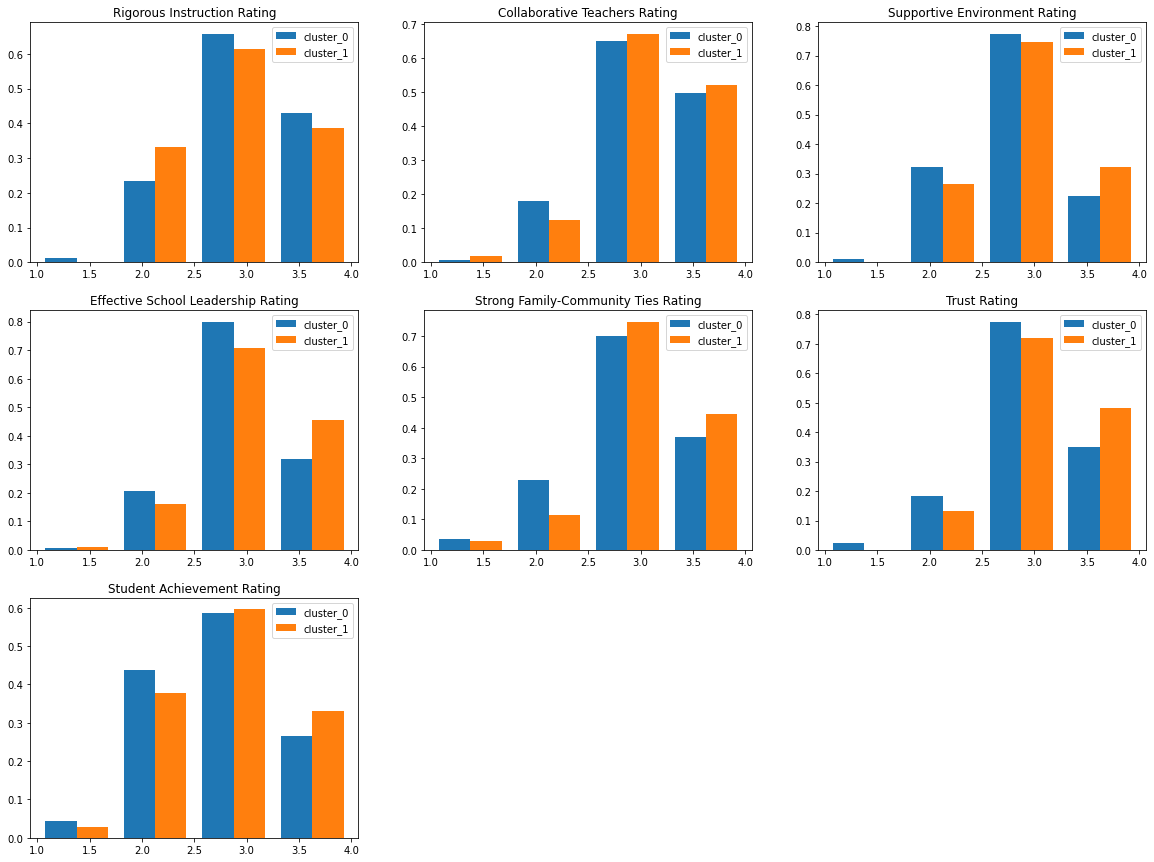

In [14]:
fig = plt.figure(figsize = (20,15));bins = 4
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['overall_pred']==0].iloc[:,i+28];y=df_NUM[df_NUM['overall_pred']==1].iloc[:,i+28]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+28]);ax.legend()

#### Basic

In [15]:
Basic = df_NUM[['Major N','Oth N','NoCrim N','Prop N','Vio N','Total N','Rigorous Instruction - Percent Positive','Collaborative Teachers - Percent Positive',\
         'Supportive Environment - Percent Positive','Effective School Leadership - Percent Positive',\
         'Rigorous Instruction Rating','Collaborative Teachers Rating', 'Supportive Environment Rating']]
data1 = preprocessing.normalize(Basic)

silhouette_result = {}
for n_clusters in range(2,7): 
    km = KMeans(n_clusters=n_clusters, random_state=10); cluster_labels = km.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels); silhouette_result[n_clusters] = silhouette_avg
    cluster_num = max(silhouette_result, key=silhouette_result.get)
print(cluster_num)    
km = KMeans(n_clusters=cluster_num); res = km.fit(data1); pred=km.predict(data1); df_NUM['basic_pred'] = list(pred)

2


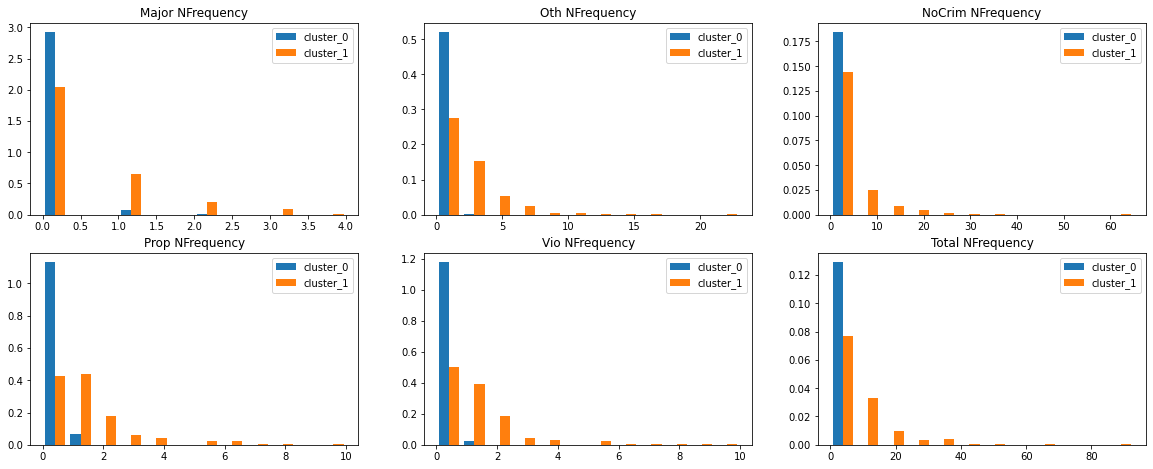

In [16]:
fig = plt.figure(figsize = (20,12));bins = 12
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['basic_pred']==0].iloc[:,i];y=df_NUM[df_NUM['basic_pred']==1].iloc[:,i]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i]+'Frequency');ax.legend()

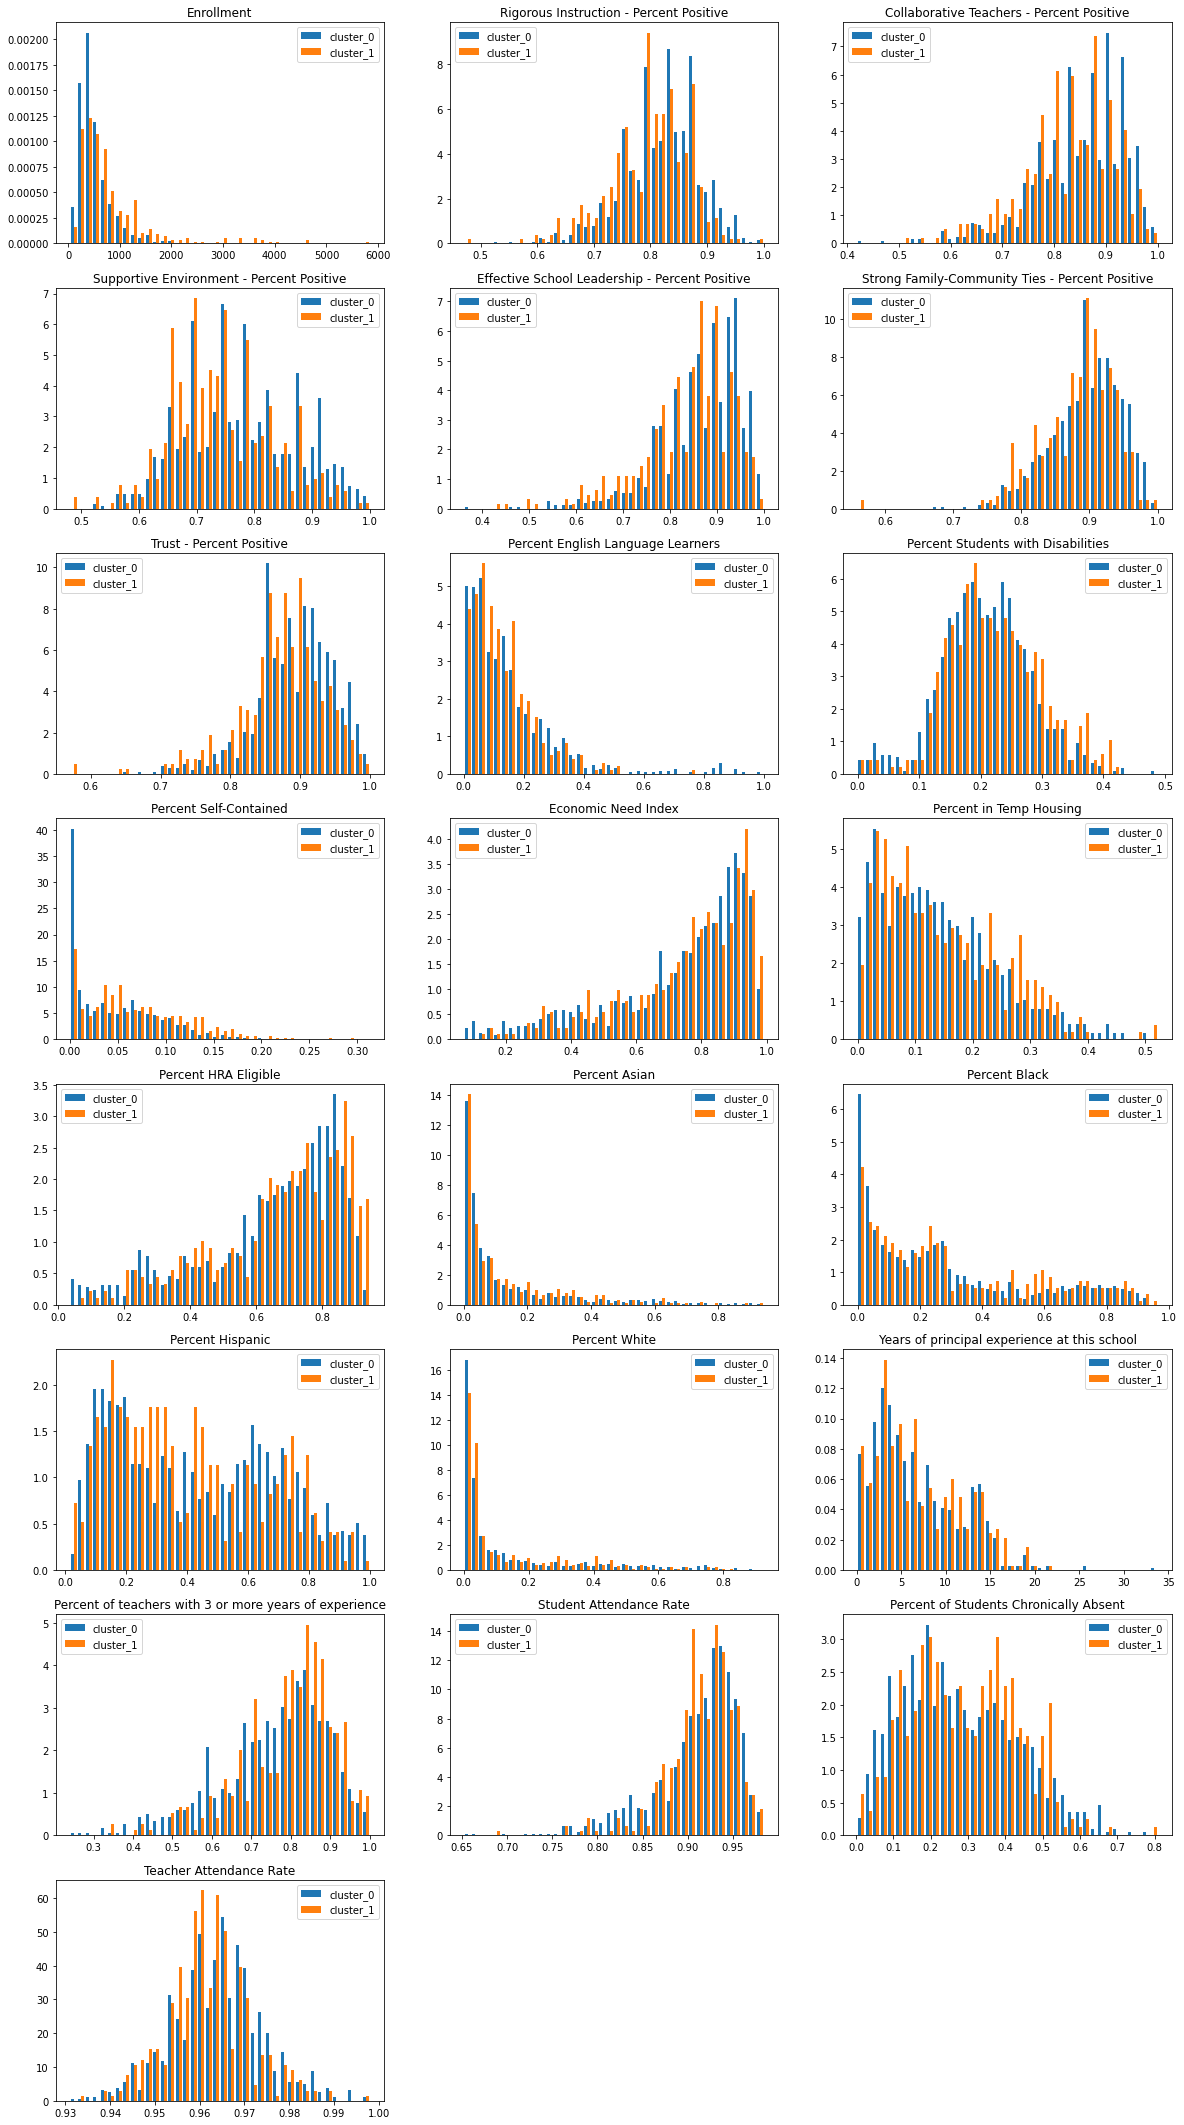

In [17]:
fig = plt.figure(figsize = (20,48));bins = 40
for i in range(22):
    ax = fig.add_subplot(10, 3, i+1)
    x=df_NUM[df_NUM['basic_pred']==0].iloc[:,i+6];y=df_NUM[df_NUM['basic_pred']==1].iloc[:,i+6]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+6]);ax.legend()

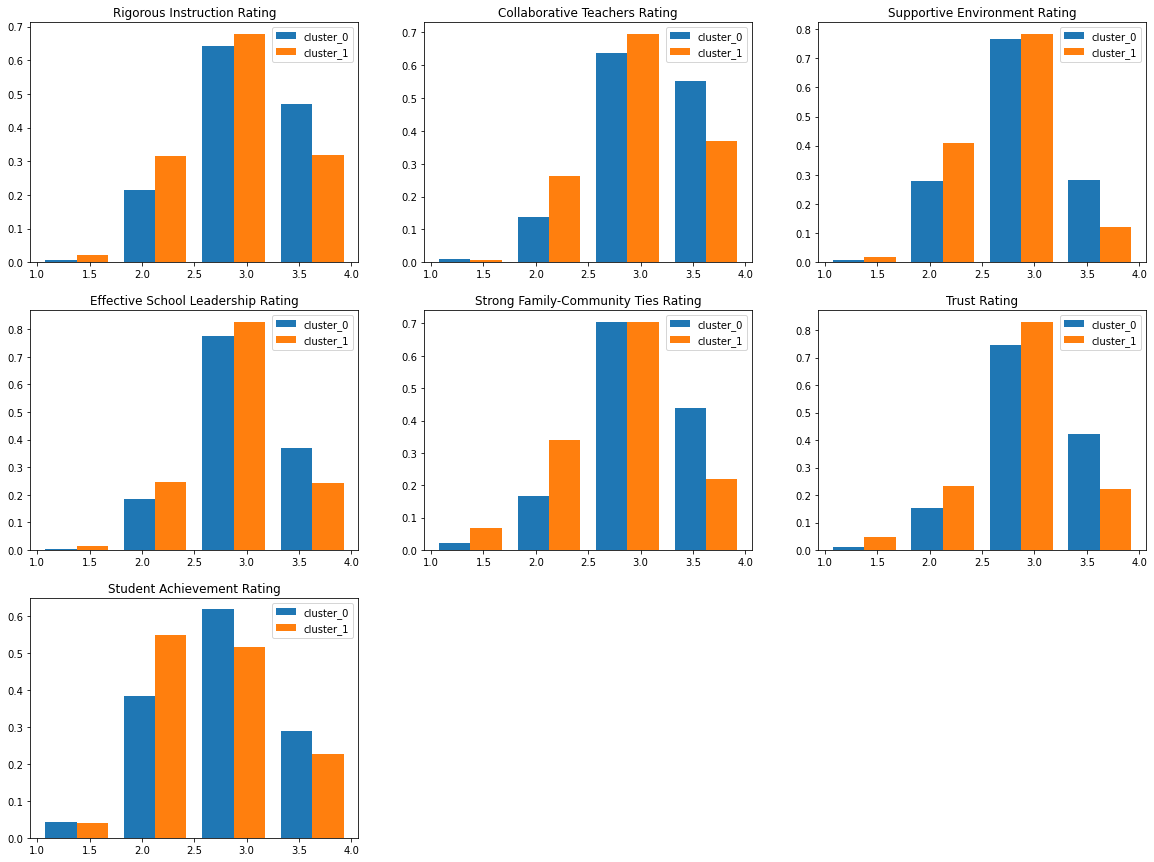

In [18]:
fig = plt.figure(figsize = (20,15));bins = 4
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['basic_pred']==0].iloc[:,i+28];y=df_NUM[df_NUM['basic_pred']==1].iloc[:,i+28]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+28]);ax.legend()

#### Education_Quality

In [19]:
Education_Quality = df_NUM[['Major N','Oth N','NoCrim N','Prop N','Vio N','Total N','Years of principal experience at this school','Percent of teachers with 3 or more years of experience','Student Attendance Rate', 'Percent of Students Chronically Absent','Teacher Attendance Rate', 'Effective School Leadership Rating']]
data1 = preprocessing.normalize(Education_Quality)

silhouette_result = {}
for n_clusters in range(2,7): 
    km = KMeans(n_clusters=n_clusters, random_state=10); cluster_labels = km.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels); silhouette_result[n_clusters] = silhouette_avg
    cluster_num = max(silhouette_result, key=silhouette_result.get)
print(cluster_num)    
km = KMeans(n_clusters=cluster_num); res = km.fit(data1); pred=km.predict(data1); df_NUM['Education_Quality_pred'] = list(pred)

2


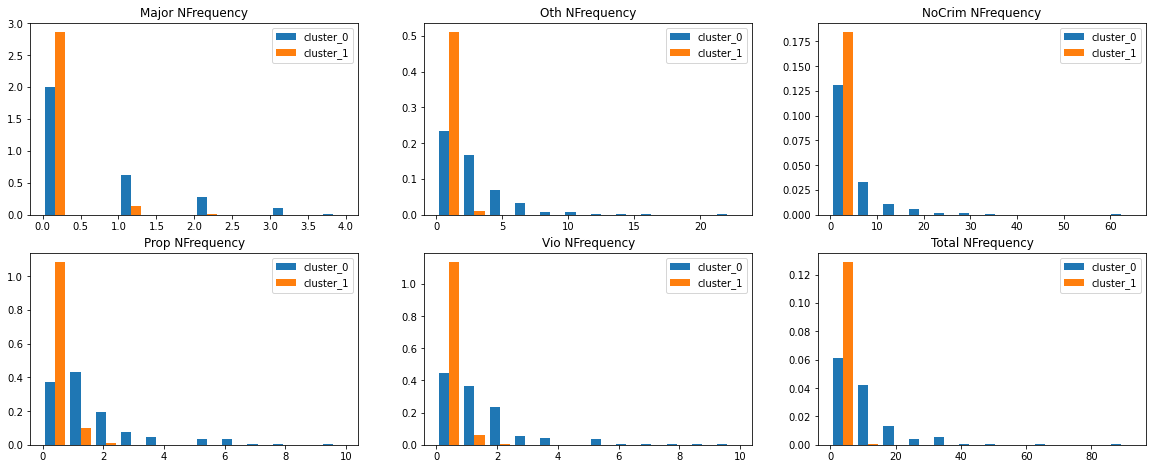

In [20]:
fig = plt.figure(figsize = (20,12));bins = 12
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['Education_Quality_pred']==0].iloc[:,i];y=df_NUM[df_NUM['Education_Quality_pred']==1].iloc[:,i]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i]+'Frequency');ax.legend()

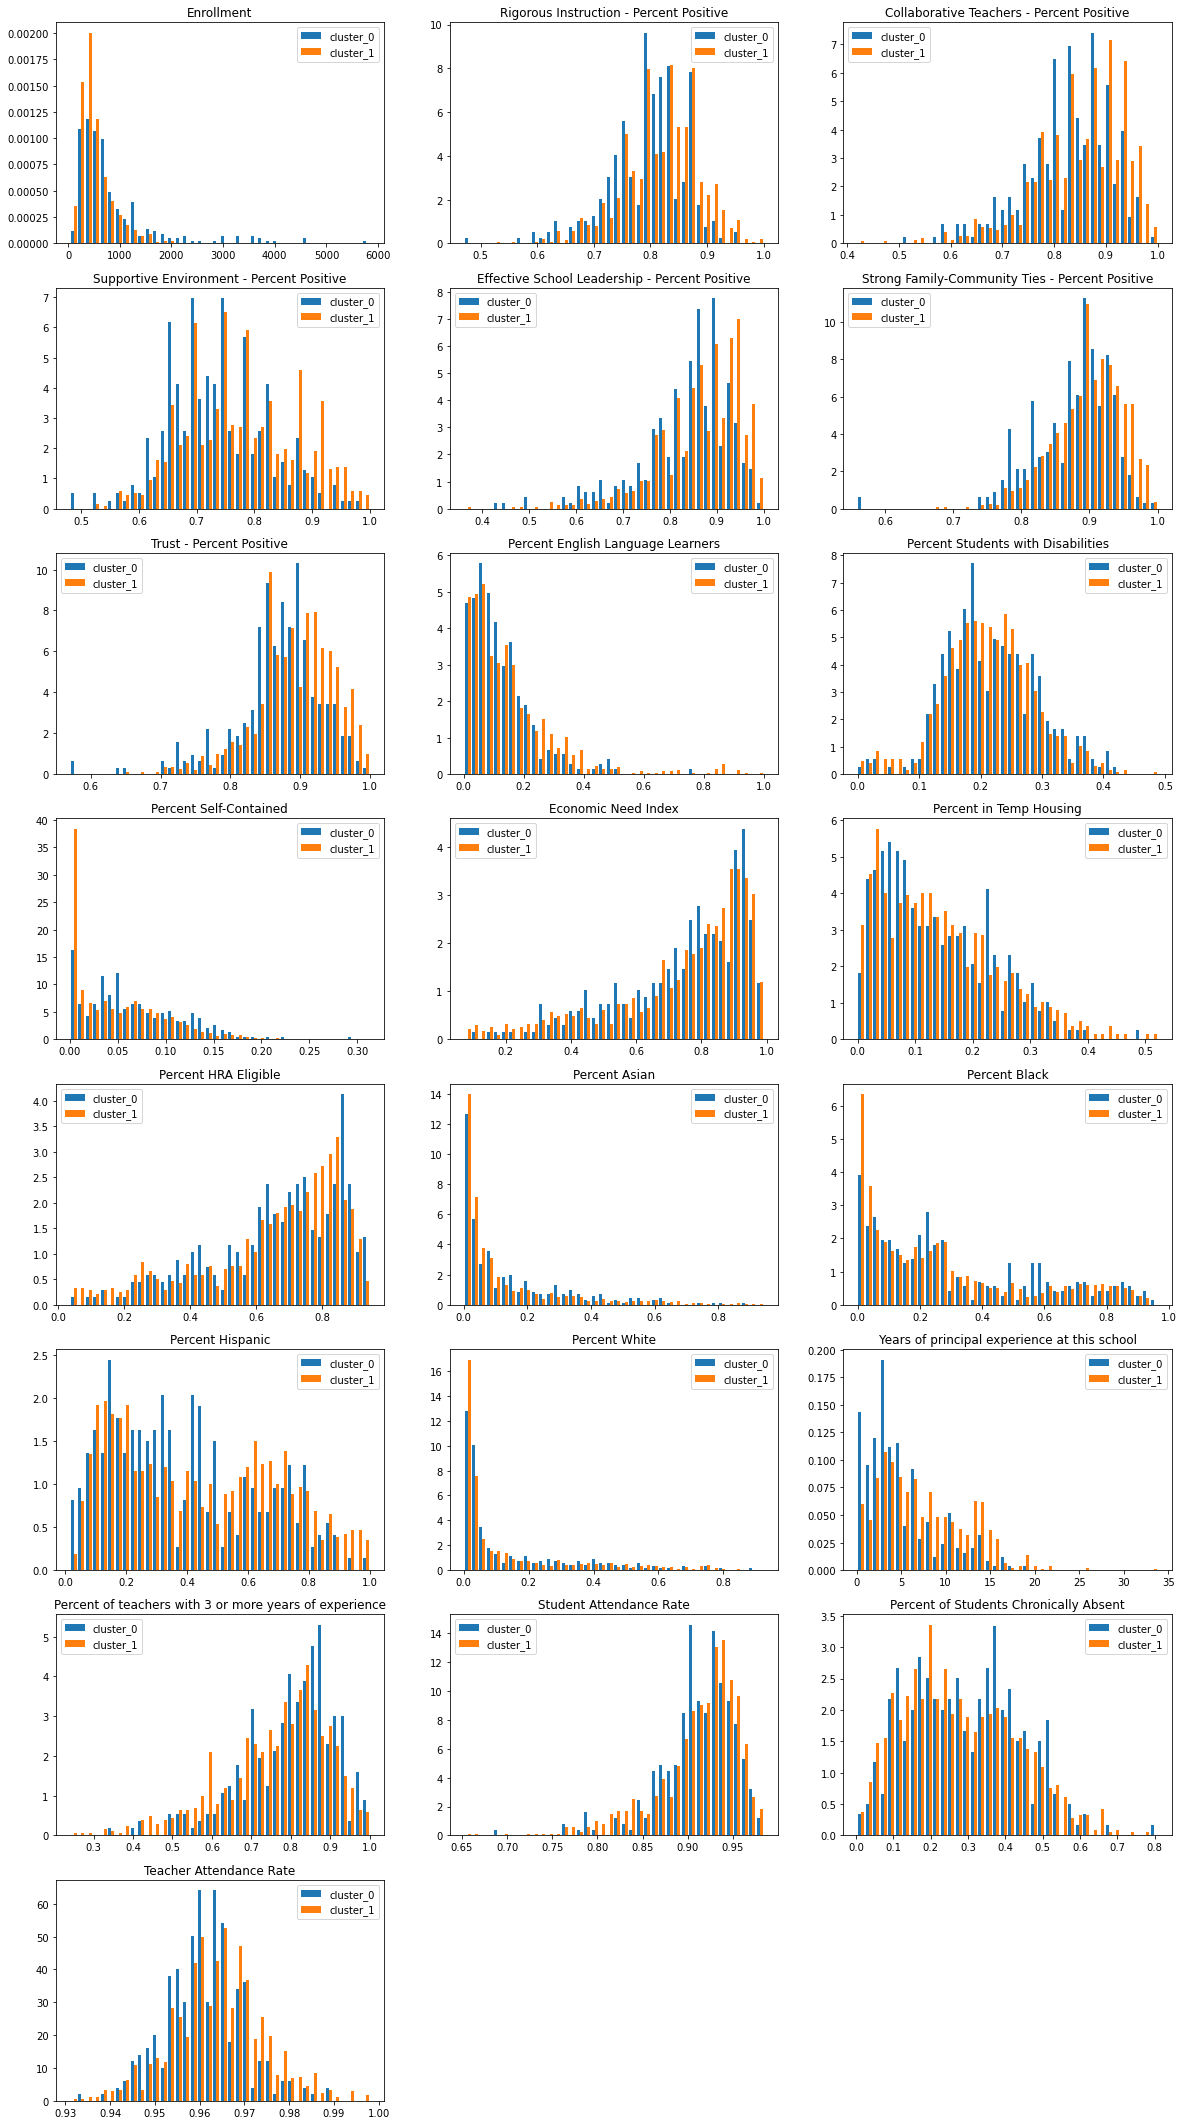

In [21]:
fig = plt.figure(figsize = (20,48));bins = 40
for i in range(22):
    ax = fig.add_subplot(10, 3, i+1)
    x=df_NUM[df_NUM['Education_Quality_pred']==0].iloc[:,i+6];y=df_NUM[df_NUM['Education_Quality_pred']==1].iloc[:,i+6]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+6]);ax.legend()

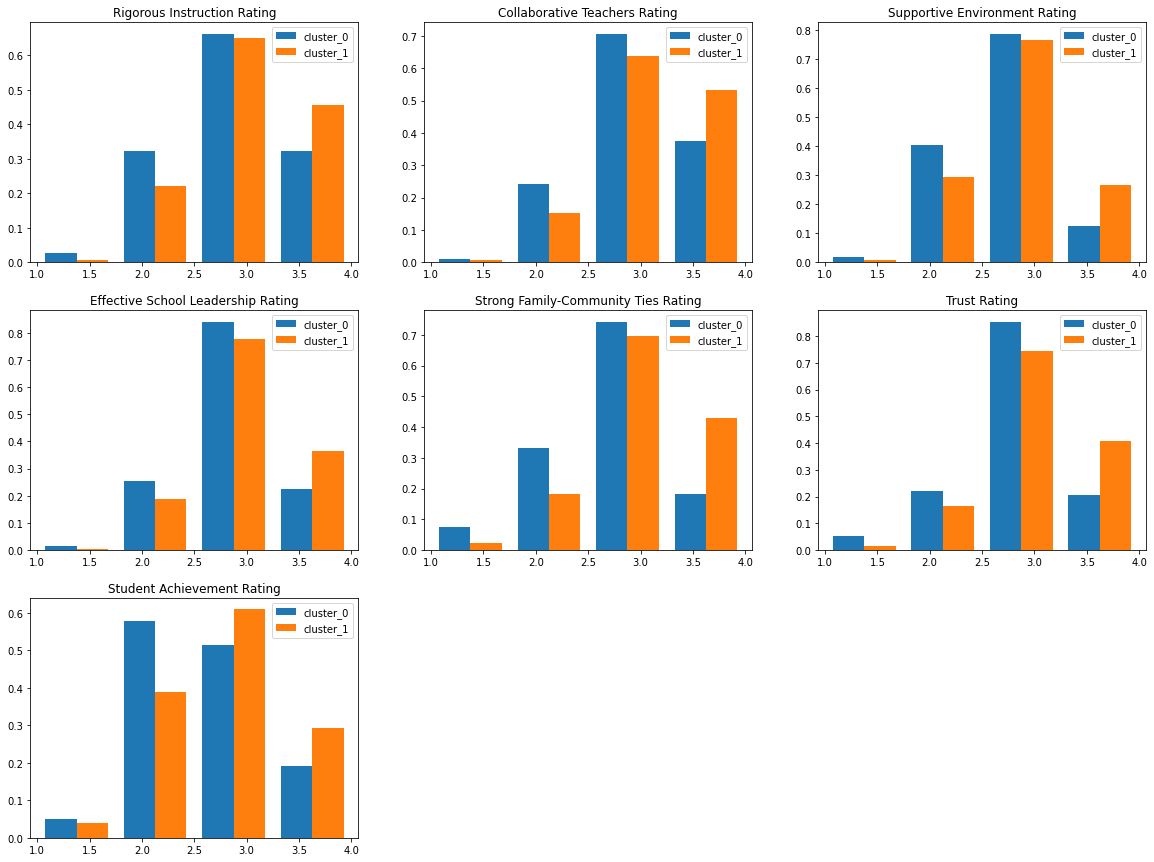

In [22]:
fig = plt.figure(figsize = (20,15));bins = 4
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['Education_Quality_pred']==0].iloc[:,i+28];y=df_NUM[df_NUM['Education_Quality_pred']==1].iloc[:,i+28]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+28]);ax.legend()

#### Whether_poor

In [23]:
Whether_poor = df_NUM[['Major N','Oth N','NoCrim N','Prop N','Vio N','Total N','Strong Family-Community Ties - Percent Positive','Trust - Percent Positive',\
                'Percent Students with Disabilities','Percent Self-Contained','Economic Need Index',\
                'Percent in Temp Housing', 'Percent HRA Eligible', 'Strong Family-Community Ties Rating', 'Trust Rating']]

data1 = preprocessing.normalize(Whether_poor)

silhouette_result = {}
for n_clusters in range(2,7): 
    km = KMeans(n_clusters=n_clusters, random_state=10); cluster_labels = km.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels); silhouette_result[n_clusters] = silhouette_avg
    cluster_num = max(silhouette_result, key=silhouette_result.get)
print(cluster_num)   
km = KMeans(n_clusters=cluster_num); res = km.fit(data1); pred=km.predict(data1); df_NUM['Whether_poor_pred'] = list(pred)

2


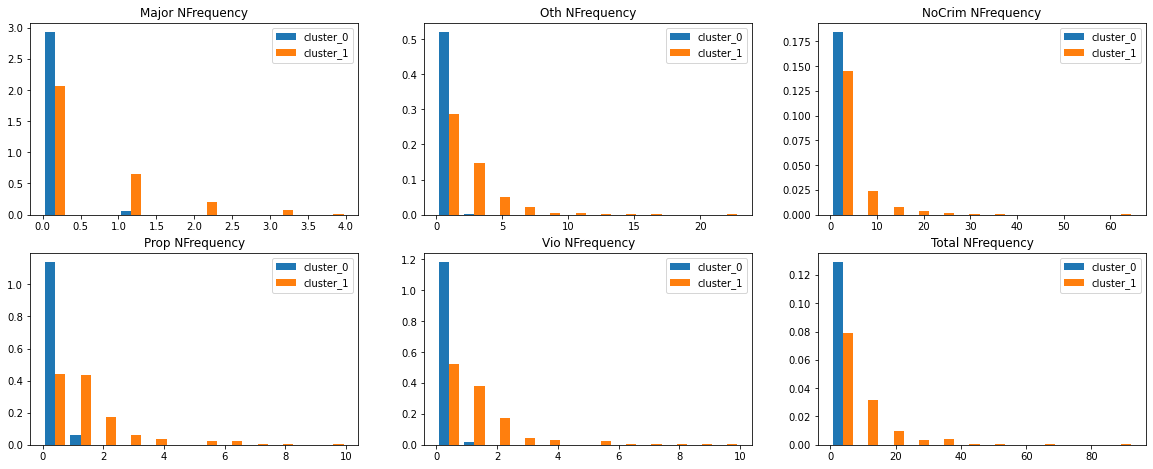

In [24]:
fig = plt.figure(figsize = (20,12));bins = 12
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['Whether_poor_pred']==0].iloc[:,i];y=df_NUM[df_NUM['Whether_poor_pred']==1].iloc[:,i]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i]+'Frequency');ax.legend()

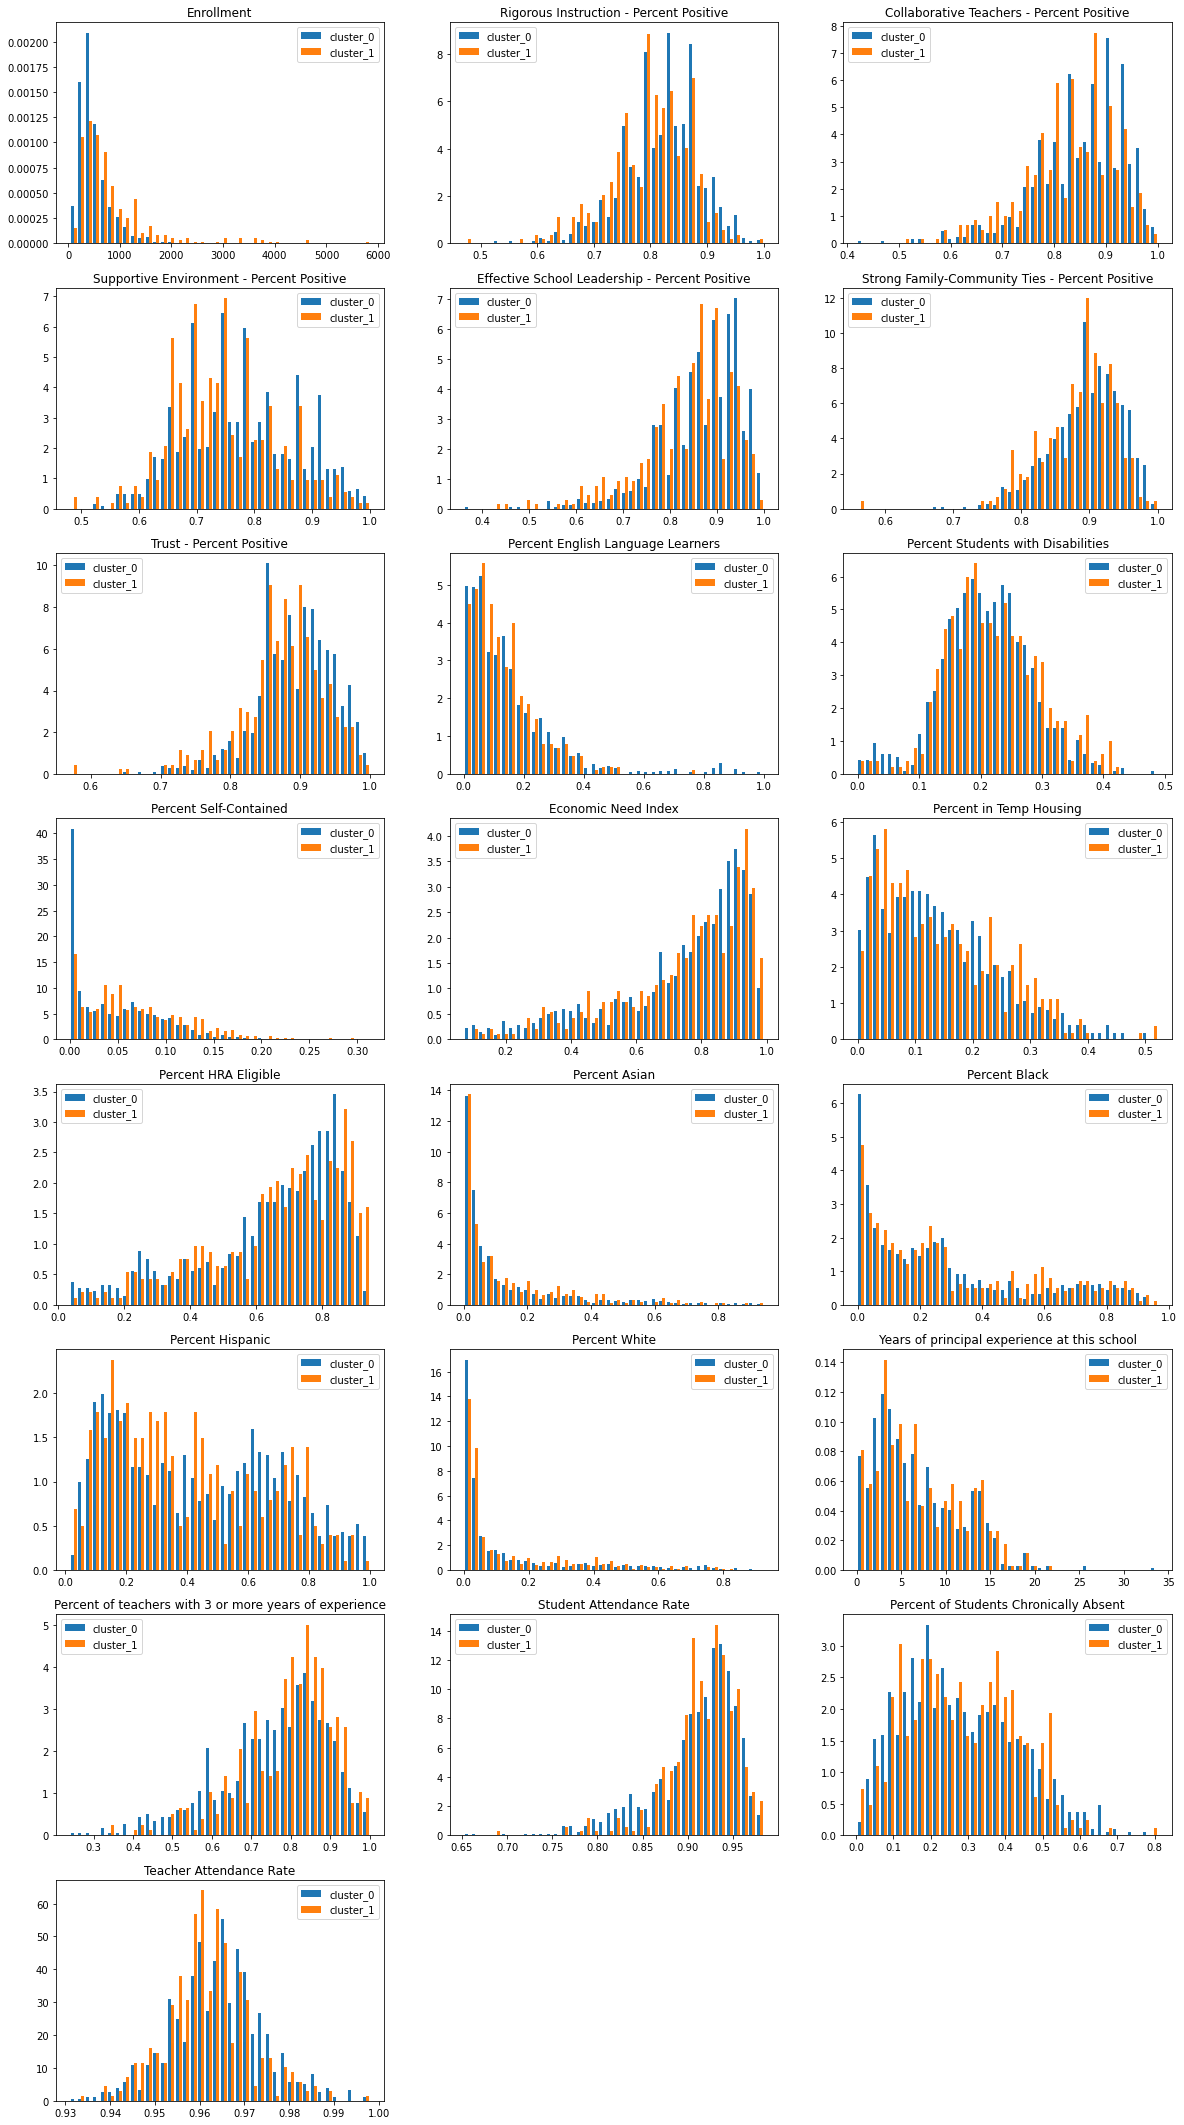

In [25]:
fig = plt.figure(figsize = (20,48));bins = 40
for i in range(22):
    ax = fig.add_subplot(10, 3, i+1)
    x=df_NUM[df_NUM['Whether_poor_pred']==0].iloc[:,i+6];y=df_NUM[df_NUM['Whether_poor_pred']==1].iloc[:,i+6]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+6]);ax.legend()

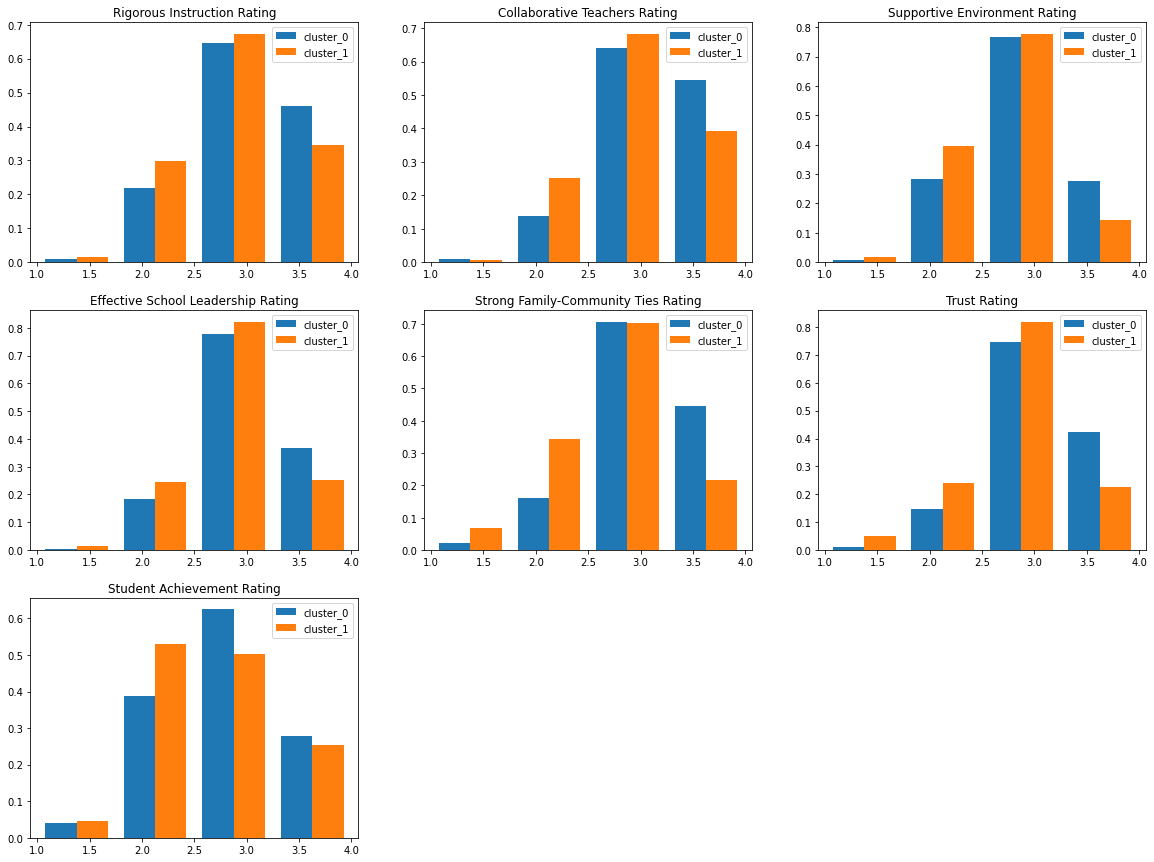

In [26]:
fig = plt.figure(figsize = (20,15));bins = 4
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['Whether_poor_pred']==0].iloc[:,i+28];y=df_NUM[df_NUM['Whether_poor_pred']==1].iloc[:,i+28]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+28]);ax.legend()

#### Race

In [27]:
Race = df_NUM[['Major N','Oth N','NoCrim N','Prop N','Vio N','Total N','Percent Asian','Percent Black', 'Percent Hispanic', 'Percent White']]
data1 = preprocessing.normalize(Race)

silhouette_result = {}
for n_clusters in range(2,7): 
    km = KMeans(n_clusters=n_clusters, random_state=10); cluster_labels = km.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels); silhouette_result[n_clusters] = silhouette_avg
    cluster_num = max(silhouette_result, key=silhouette_result.get)
print(cluster_num)    
km = KMeans(n_clusters=cluster_num); res = km.fit(data1); pred=km.predict(data1); df_NUM['race_pred'] = list(pred)

4


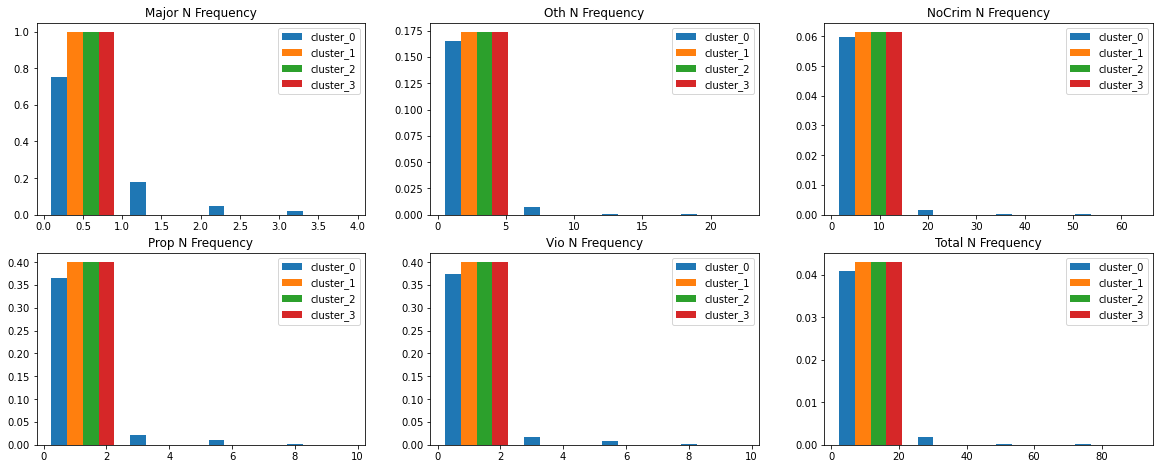

In [28]:
fig = plt.figure(figsize = (20,12));bins = 4
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['race_pred']==0].iloc[:,i];y=df_NUM[df_NUM['race_pred']==1].iloc[:,i];z=df_NUM[df_NUM['race_pred']==2].iloc[:,i];q=df_NUM[df_NUM['race_pred']==3].iloc[:,i]
    ax.hist([x, y, z, q], bins, label=['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3'],density=True)
    ax.set_title(df_NUM.columns[i]+' Frequency');ax.legend()

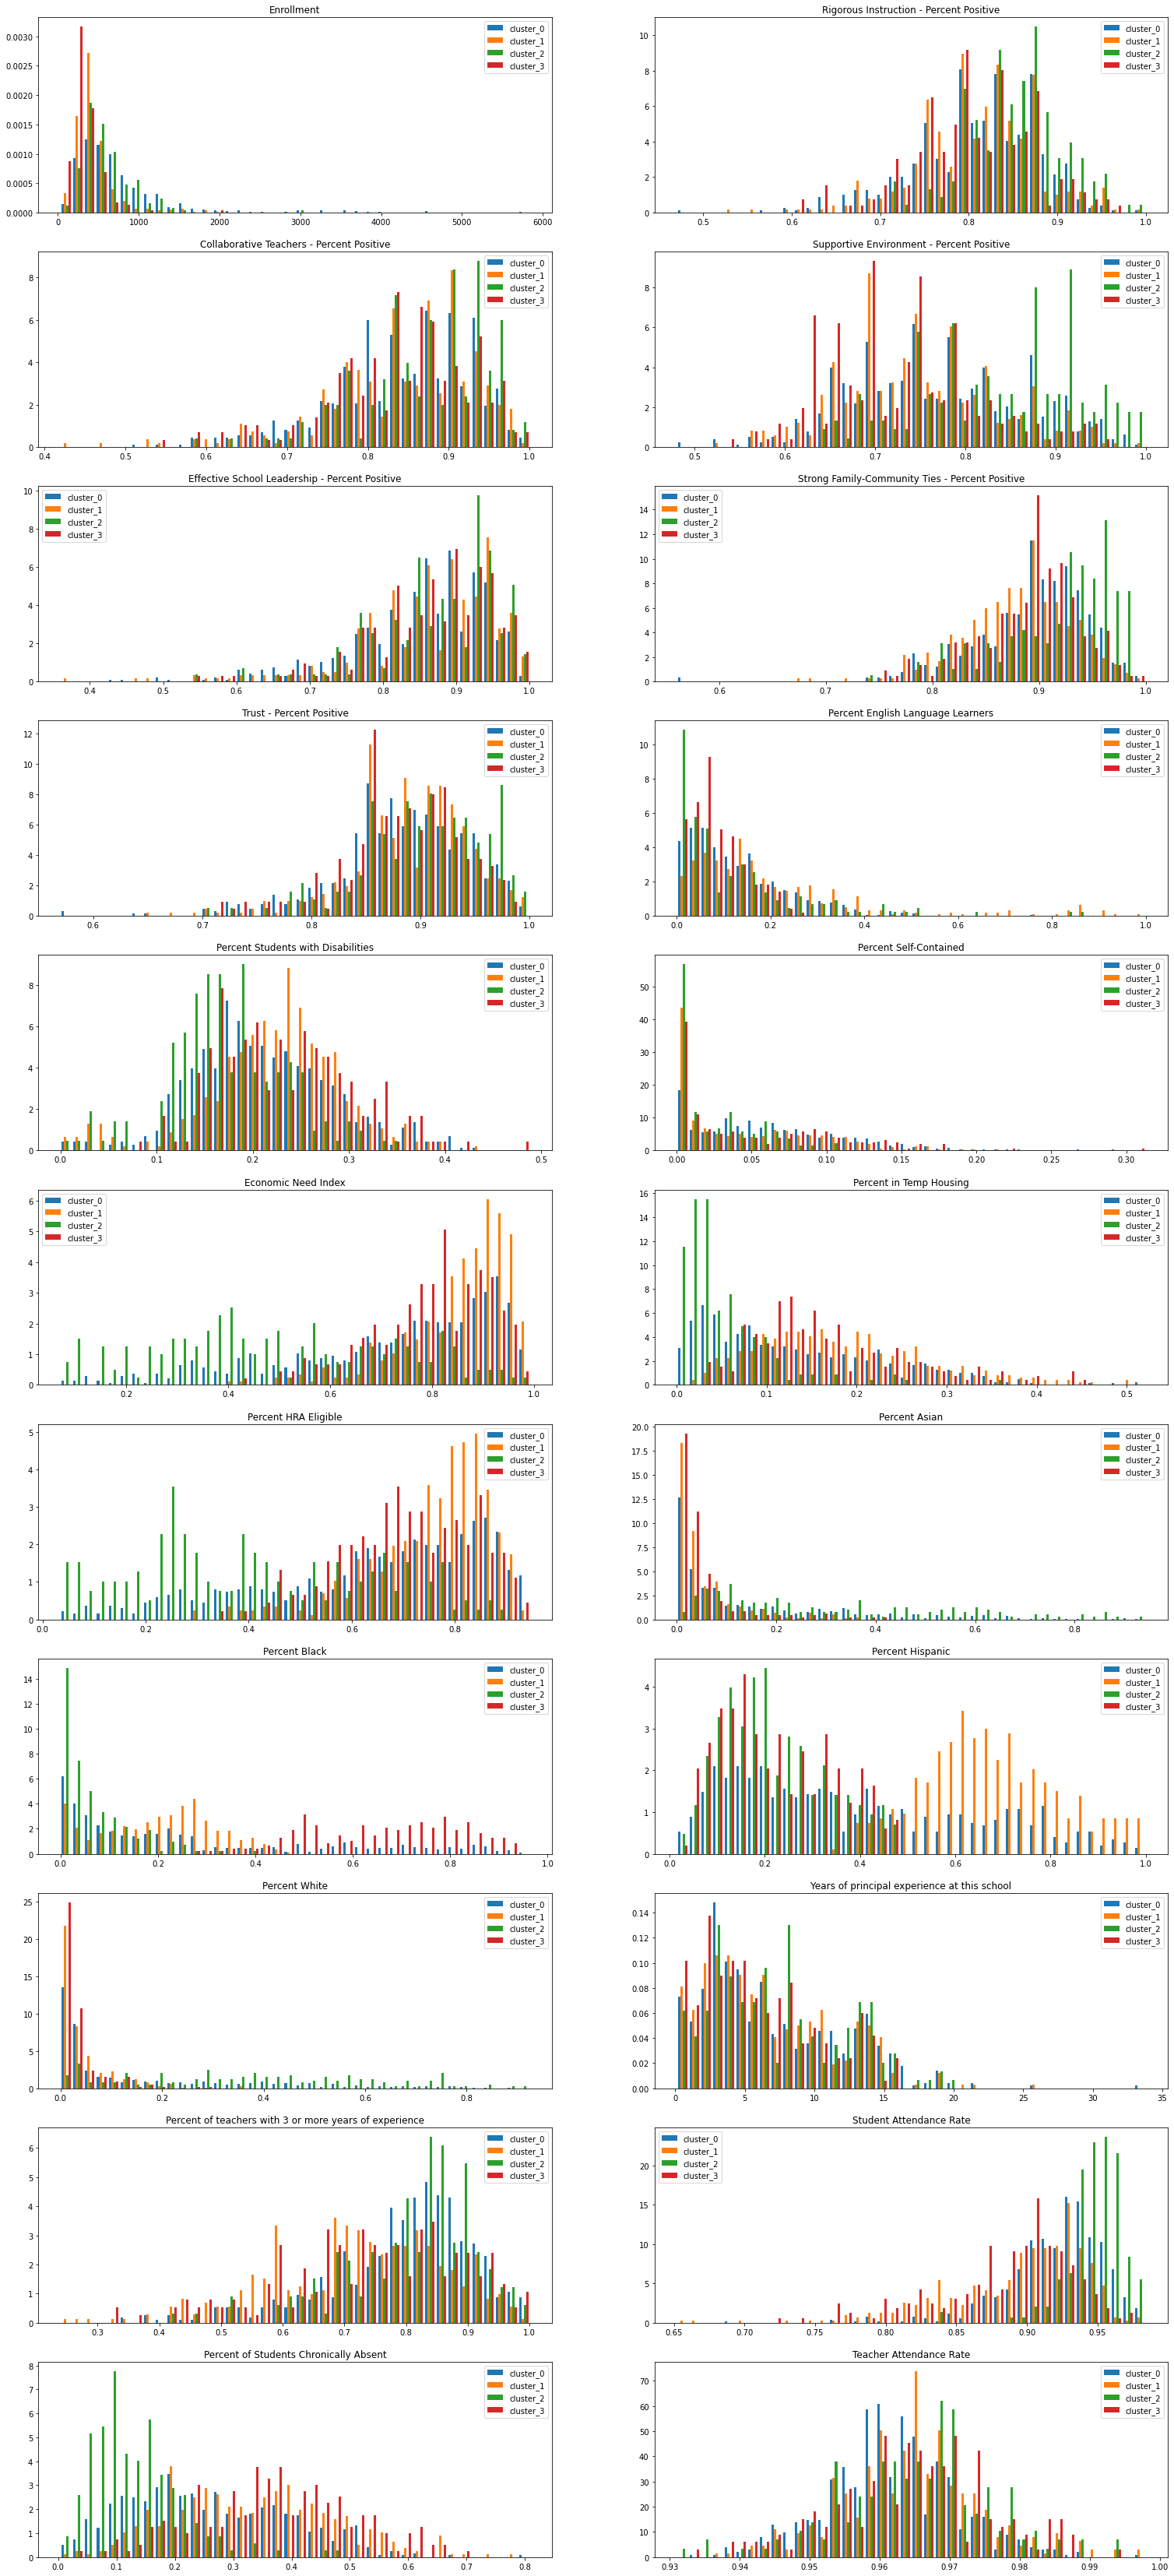

In [29]:
fig = plt.figure(figsize = (26,60));bins = 40
for i in range(22):
    ax = fig.add_subplot(11, 2, i+1)
    x=df_NUM[df_NUM['race_pred']==0].iloc[:,i+6];y=df_NUM[df_NUM['race_pred']==1].iloc[:,i+6];z=df_NUM[df_NUM['race_pred']==2].iloc[:,i+6];q=df_NUM[df_NUM['race_pred']==3].iloc[:,i+6]
    ax.hist([x, y, z, q], bins, label=['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3'],density=True)
    ax.set_title(df_NUM.columns[i+6]);ax.legend()

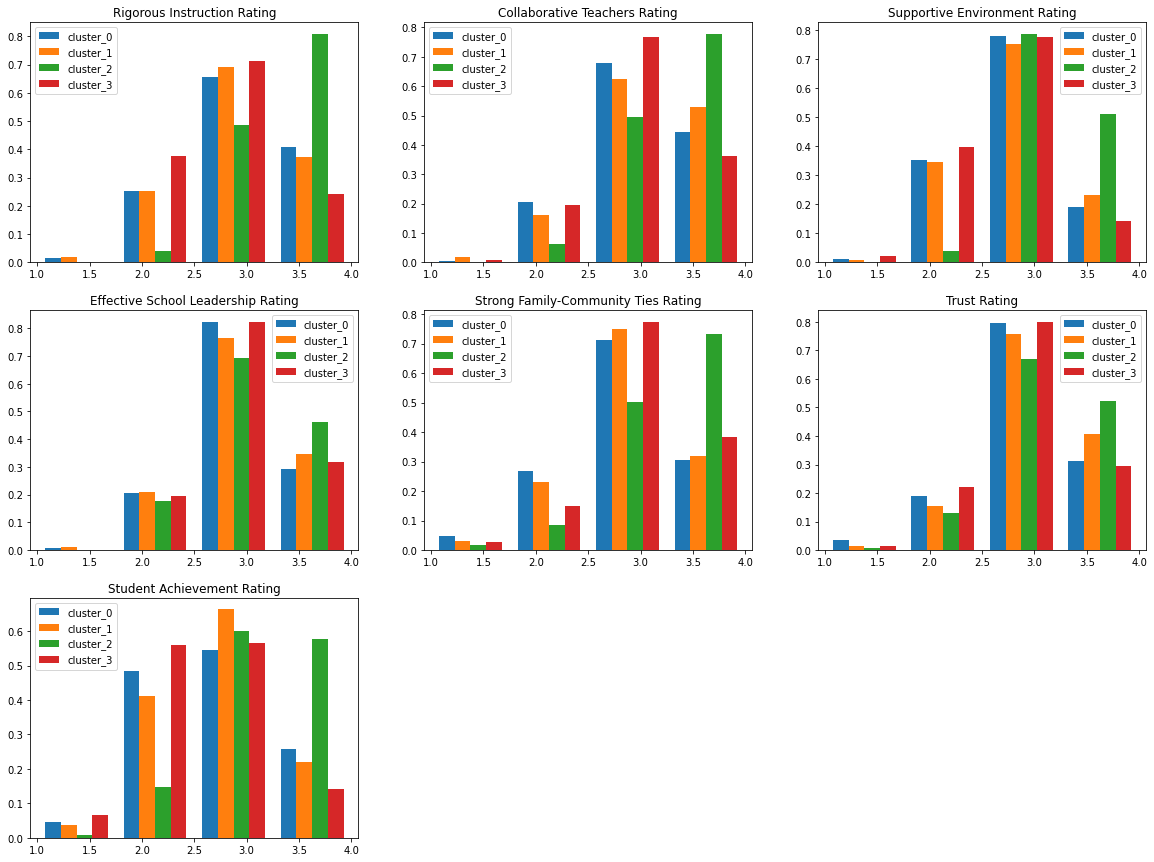

In [30]:
fig = plt.figure(figsize = (20,15));bins = 4
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['race_pred']==0].iloc[:,i+28];y=df_NUM[df_NUM['race_pred']==1].iloc[:,i+28];z=df_NUM[df_NUM['race_pred']==2].iloc[:,i+28];q=df_NUM[df_NUM['race_pred']==3].iloc[:,i+28]
    ax.hist([x, y, z, q], bins, label=['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3'],density=True)
    ax.set_title(df_NUM.columns[i+28]);ax.legend()

#### Without Race

In [31]:
Without_Race = df_NUM[['Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N', 'Total N',\
       'Enrollment', 'Rigorous Instruction - Percent Positive',\
       'Collaborative Teachers - Percent Positive','Supportive Environment - Percent Positive',\
       'Effective School Leadership - Percent Positive','Strong Family-Community Ties - Percent Positive',\
       'Trust - Percent Positive', 'Percent English Language Learners',\
       'Percent Students with Disabilities', 'Percent Self-Contained',\
       'Economic Need Index', 'Percent in Temp Housing','Percent HRA Eligible',\
       'Years of principal experience at this school','Percent of teachers with 3 or more years of experience',\
       'Student Attendance Rate', 'Percent of Students Chronically Absent','Teacher Attendance Rate', 'Rigorous Instruction Rating',\
       'Collaborative Teachers Rating', 'Supportive Environment Rating','Effective School Leadership Rating',\
       'Strong Family-Community Ties Rating', 'Trust Rating','Student Achievement Rating', 'School Type_Elementary',\
       'School Type_High School', 'School Type_K-8', 'School Type_Middle','overall_pred', 'basic_pred']]
data1 = preprocessing.normalize(Without_Race)

silhouette_result = {}
for n_clusters in range(2,7): 
    km = KMeans(n_clusters=n_clusters, random_state=10); cluster_labels = km.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels); silhouette_result[n_clusters] = silhouette_avg
    cluster_num = max(silhouette_result, key=silhouette_result.get)
print(cluster_num)    
km = KMeans(n_clusters=cluster_num); res = km.fit(data1); pred=km.predict(data1); df_NUM['Without_Race_pred'] = list(pred)

2


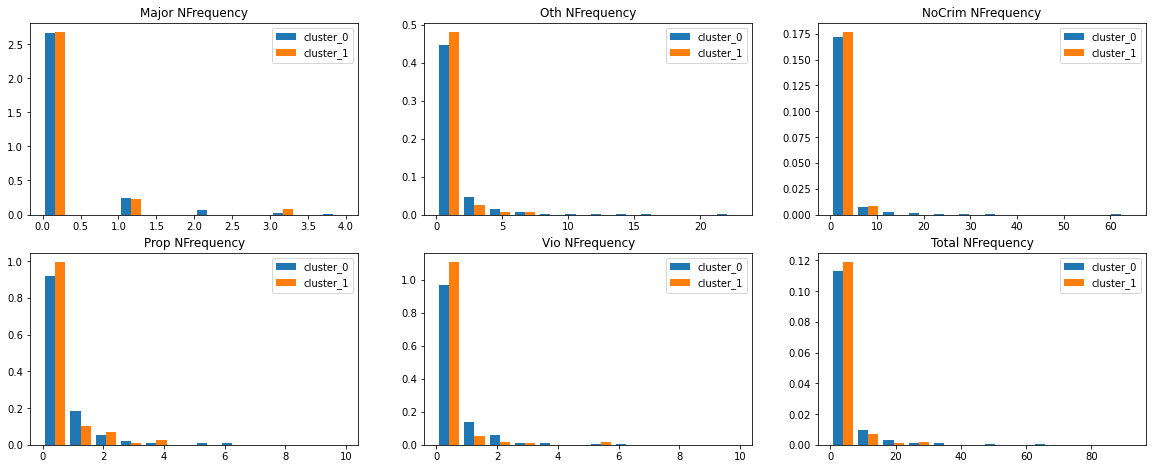

In [32]:
fig = plt.figure(figsize = (20,12));bins = 12
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['Without_Race_pred']==0].iloc[:,i];y=df_NUM[df_NUM['Without_Race_pred']==1].iloc[:,i]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i]+'Frequency');ax.legend()

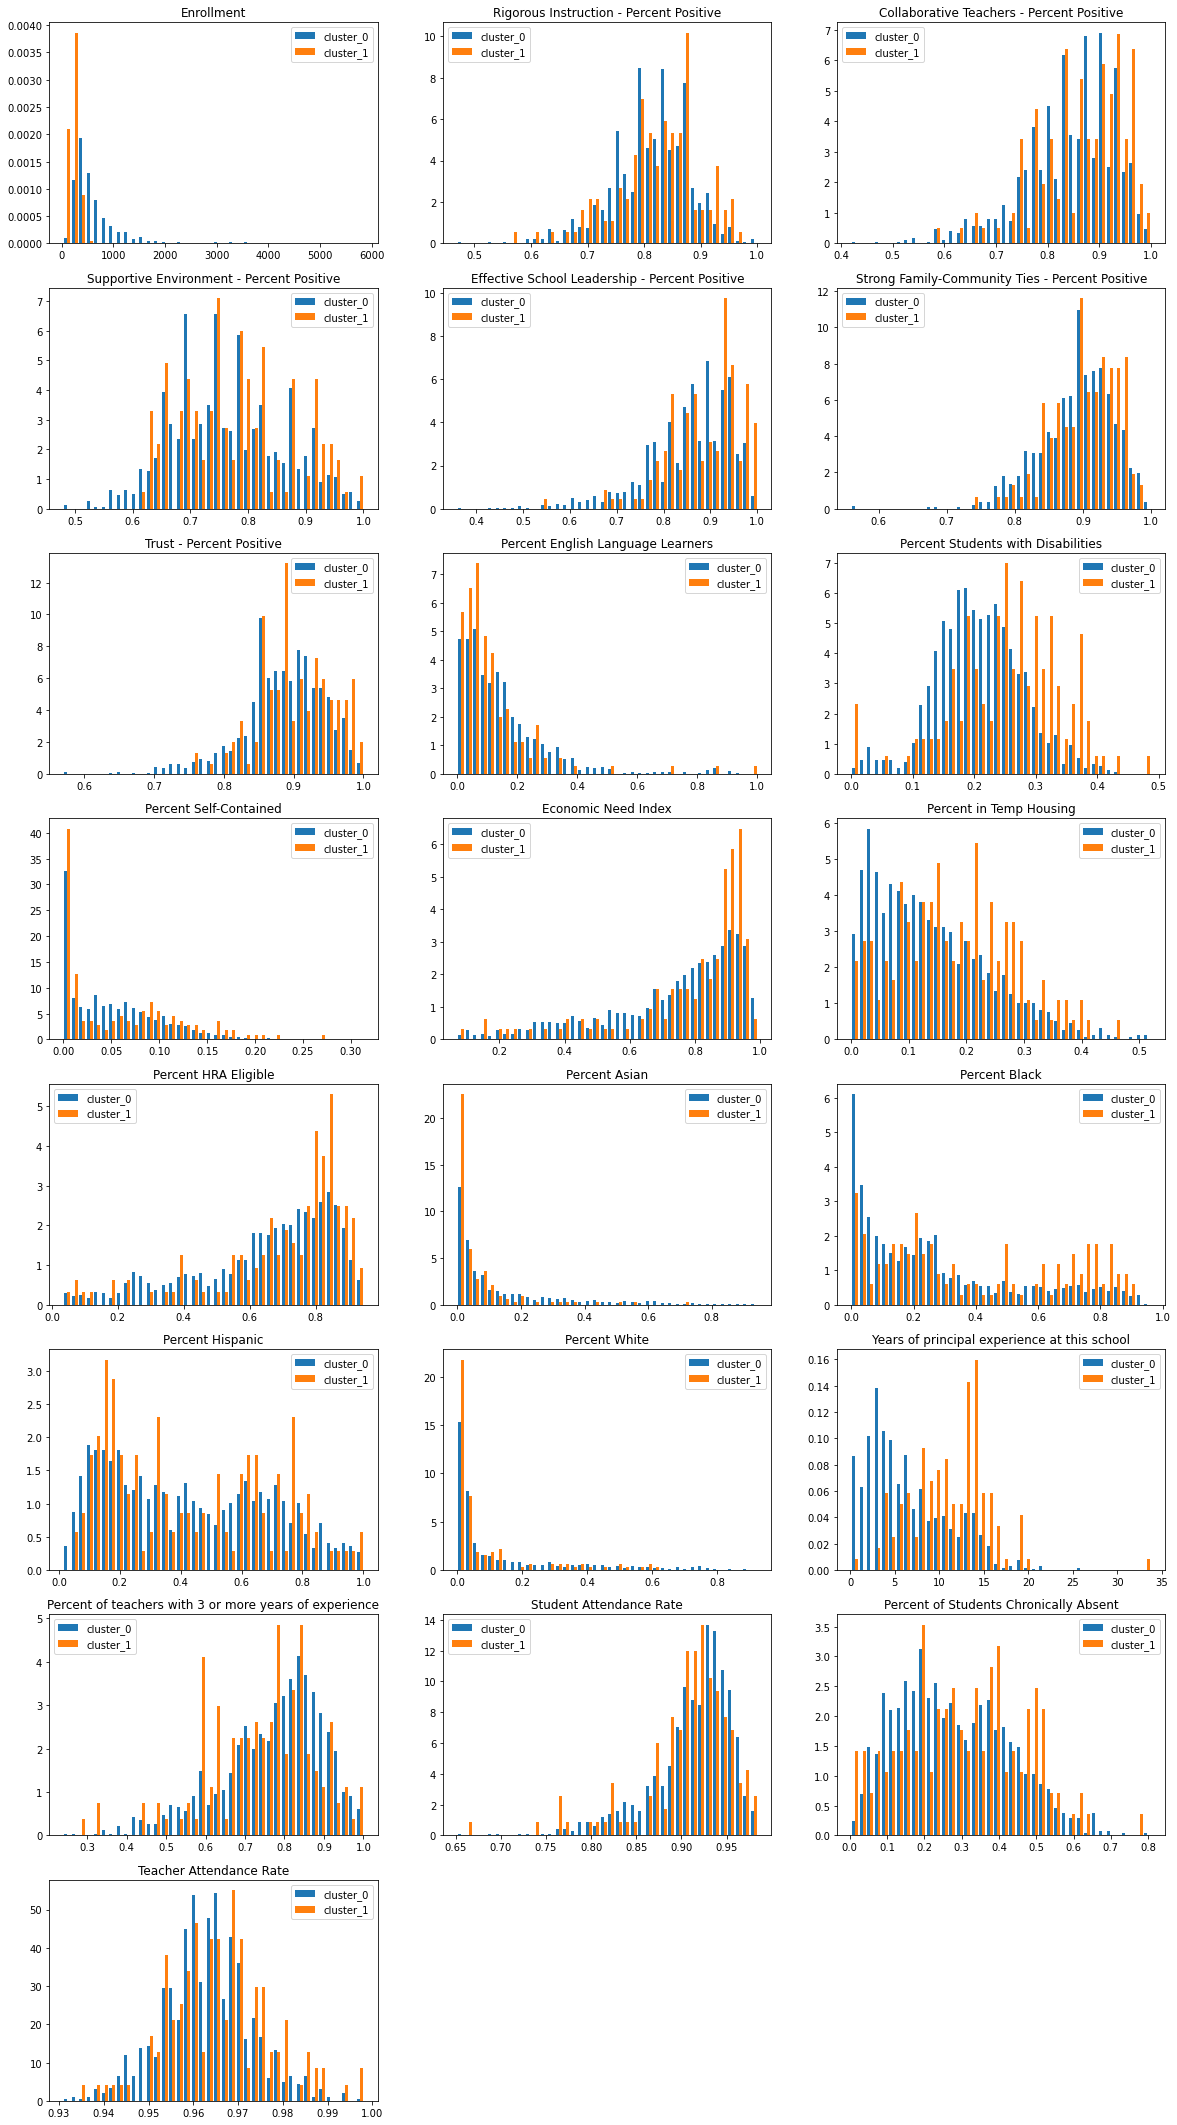

In [33]:
fig = plt.figure(figsize = (20,48));bins = 40
for i in range(22):
    ax = fig.add_subplot(10, 3, i+1)
    x=df_NUM[df_NUM['Without_Race_pred']==0].iloc[:,i+6];y=df_NUM[df_NUM['Without_Race_pred']==1].iloc[:,i+6]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+6]);ax.legend()

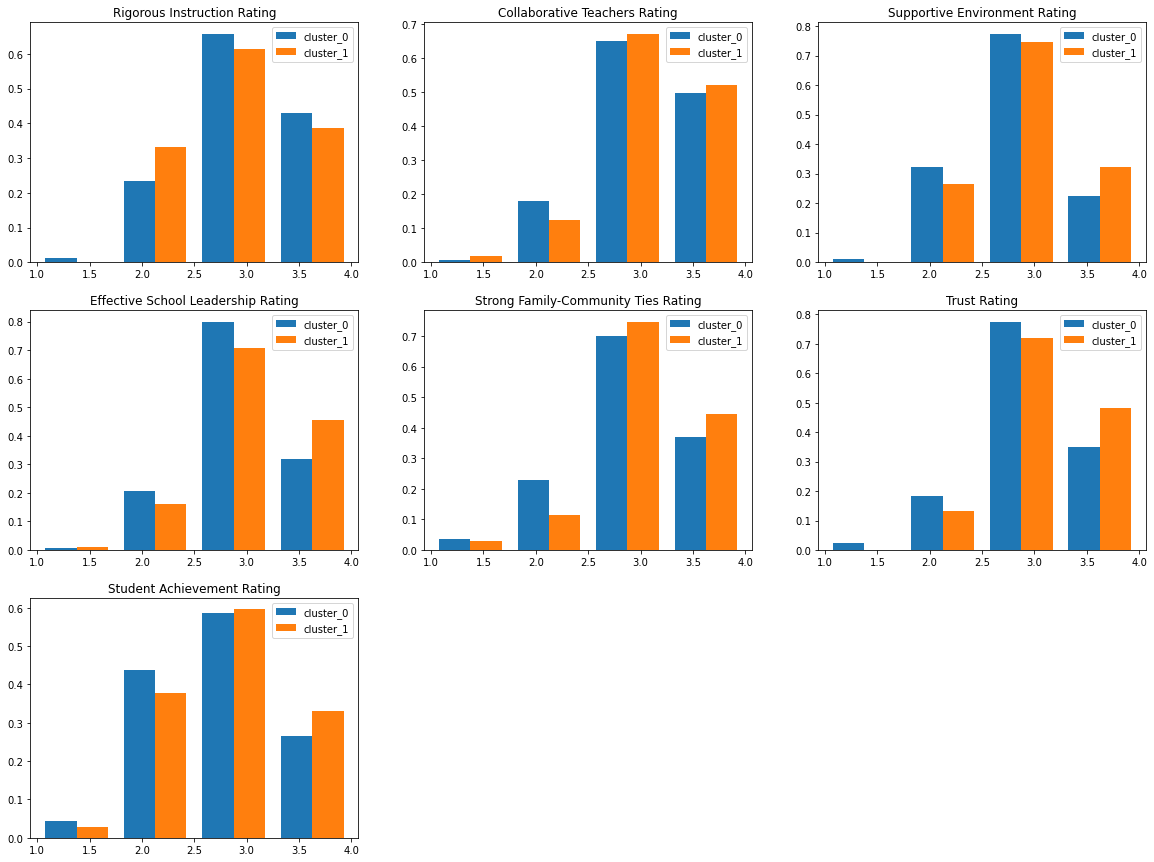

In [34]:
fig = plt.figure(figsize = (20,15));bins = 4
for i in range(7):
    ax = fig.add_subplot(3, 3, i+1)
    x=df_NUM[df_NUM['Without_Race_pred']==0].iloc[:,i+28];y=df_NUM[df_NUM['Without_Race_pred']==1].iloc[:,i+28]
    ax.hist([x, y], bins, label=['cluster_0', 'cluster_1'],density=True)
    ax.set_title(df_NUM.columns[i+28]);ax.legend()

In [35]:
df_NUM.head()

,Major N,Oth N,NoCrim N,Prop N,Vio N,Total N,Enrollment,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,...,School Type_Elementary,School Type_High School,School Type_K-8,School Type_Middle,overall_pred,basic_pred,Education_Quality_pred,Whether_poor_pred,race_pred,Without_Race_pred
0,1.0,1.0,0.0,2.0,0.0,4.0,751,0.88,0.92,0.88,...,1,0,0,0,0,1,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,339,0.83,0.94,0.69,...,0,0,0,1,0,0,1,0,3,0
2,0.0,0.0,0.0,0.0,0.0,0.0,99,0.74,0.80,0.69,...,0,0,0,1,1,0,1,0,3,1
3,0.0,2.0,3.0,2.0,0.0,7.0,369,0.87,0.96,0.93,...,1,0,0,0,1,1,1,1,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,643,0.77,0.76,0.88,...,1,0,0,0,0,0,1,0,2,0


In [42]:
df_NUM

,Major N,Oth N,NoCrim N,Prop N,Vio N,Total N,Enrollment,Rigorous Instruction - Percent Positive,Collaborative Teachers - Percent Positive,Supportive Environment - Percent Positive,...,School Type_Elementary,School Type_High School,School Type_K-8,School Type_Middle,overall_pred,basic_pred,Education_Quality_pred,Whether_poor_pred,race_pred,Without_Race_pred
0,1.0,1.0,0.0,2.0,0.0,4.0,751,0.88,0.92,0.88,...,1,0,0,0,0,1,0,1,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,339,0.83,0.94,0.69,...,0,0,0,1,0,0,1,0,3,0
2,0.0,0.0,0.0,0.0,0.0,0.0,99,0.74,0.80,0.69,...,0,0,0,1,1,0,1,0,3,1
3,0.0,2.0,3.0,2.0,0.0,7.0,369,0.87,0.96,0.93,...,1,0,0,0,1,1,1,1,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,643,0.77,0.76,0.88,...,1,0,0,0,0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,0.0,5.0,1.0,3.0,2.0,11.0,410,0.73,0.69,0.65,...,0,1,0,0,0,1,0,1,0,0
1347,0.0,1.0,0.0,1.0,0.0,2.0,1320,0.92,0.88,0.89,...,0,1,0,0,0,0,1,0,0,0
1348,0.0,0.0,0.0,0.0,0.0,0.0,466,0.71,0.77,0.66,...,0,1,0,0,0,0,1,0,1,0
1349,0.0,0.0,0.0,0.0,0.0,0.0,395,0.72,0.81,0.57,...,0,1,0,0,0,0,1,0,1,0


In [44]:
depen_clus = pd.concat([df_NUM[['overall_pred', 'basic_pred', 'Education_Quality_pred','Whether_poor_pred', 'race_pred',\
                                'Without_Race_pred']], data[['DBN']]], axis=1)

In [46]:
depen_clus.columns = ['overall_pred_dep', 'basic_pred_dep', 'Education_Quality_pred_dep','Whether_poor_pred_dep', 'race_pred_dep',\
                      'Without_Race_pred_dep','DBN']

In [48]:
depen_clus.to_csv('depen_clus.csv')